# Initialize packages

In [1]:
import numpy as np
import xarray as xr
import dfm_tools as dfmt

In [2]:
import glob
import warnings

In [81]:
import dask
import os
import pandas as pd

In [3]:
from dask_jobqueue import SLURMCluster
from dask.distributed import Client

# Initialize Dask cluster

In [4]:
n_cores = 16
n_processes = 4
mem_lim = str(336)+'GB' #taking the entire node #str(int(np.floor(336/(n_cores*n_processes))))+'GB' # 768 GB of memory for one entire memory node on DelftBlue

In [5]:
mem_lim

'336GB'

In [6]:
cluster = SLURMCluster(name='dask-cluster',
                       cores=n_cores,
                       memory=mem_lim,
                       processes=n_processes,
                       interface='ib0',
                       queue='genoa',
                       walltime='04:00:00',
                       asynchronous=0)

In [7]:
print(cluster.job_script())

#!/usr/bin/env bash

#SBATCH -J dask-worker
#SBATCH -p genoa
#SBATCH -n 1
#SBATCH --cpus-per-task=16
#SBATCH --mem=313G
#SBATCH -t 04:00:00

/home/mgeraeds/.conda/envs/dfm_proc_env/bin/python -m distributed.cli.dask_worker tcp://172.22.63.191:35159 --name dummy-name --nthreads 4 --memory-limit 78.23GiB --nworkers 4 --nanny --death-timeout 60 --interface ib0



In [8]:
cluster.scale(1)

In [9]:
client = Client(cluster)

In [10]:
client

<Client: 'tcp://172.22.63.191:35159' processes=4 threads=16, memory=312.92 GiB>

In [80]:
mem_lim

'336GB'

In [11]:
client.dashboard_link

'http://172.22.63.191:8787/status'

# Load large (complete) dataset

In [12]:
input_regex = r'/projects/0/einf1300/saltis-wp3-1/C_Work/00_RMM3d_2022_simulations/computations/B02_2022_jul21-aug7/B02_2022_jul21-aug7_sm/RMM_dflowfm_2022_jul21_aug7_sm_000*_map.nc'

Check if any of the input files are corrupted.

In [14]:
## 1. Input tests
# 1.x. Loop through all of the files and write when there is something wrong with the file
file_list = glob.glob(input_regex)

# 1.x Make a list for corrupted files
corrupted = []

for file in file_list:

    file_name = file.split('/')[-1]
    
    try:
        test = xr.open_dataset(file)
    except:
        warnings.warn(f'The file {file_name} seems to be corrupted. Check your inputs.', UserWarning)
        corrupted.append(file)

If any of the files are corrupted, take them out of the file list to be loaded.

In [15]:
# I.x Check if there are any corrupted files in the listed files
if len(corrupted) > 0:
    print('There are corrupted files. These will be taken out of the file list for the next tests.')
    
# I.x Get the entire input list and remove the corrupted files
input_files = [f for f in glob.glob(input_regex) if not f in corrupted]

Append another random partition for testing purposes.

In [17]:
input_files.append('/projects/0/einf1300/saltis-wp3-1/C_Work/00_RMM3d_2022_simulations/computations/B02_2022_jul21-aug7/B02_2022_jul21-aug7_sm/RMM_dflowfm_2022_jul21_aug7_sm_0122_map.nc')

Load the data.

In [18]:
data_xr = dfmt.open_partitioned_dataset(input_files, chunks={'time':1})

>> xu.open_dataset() with 11 partition(s): 1 

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


2 

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


3 

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


4 

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


5 

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


6 

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


7 

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


8 

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


9 

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


10 

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


11 

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


: 11.80 sec
>> xu.merge_partitions() with 11 partition(s): 0.81 sec
>> some variables dropped with merging of partitions: ['mesh2d_face_x_bnd', 'mesh2d_face_y_bnd']
>> dfmt.open_partitioned_dataset() total: 12.62 sec


Determine the variables to keep for the next computation and define `ds`.

In [49]:
keep_variables = ['mesh2d_sa1', 'mesh2d_node_z', 'mesh2d_ucx', 'mesh2d_ucy', 'mesh2d_ucz', 'mesh2d_vol1', 'mesh2d_vicwwu','mesh2d_tem1']
ds = data_xr[keep_variables]

Visualize the loaded data to see if it's consistent.

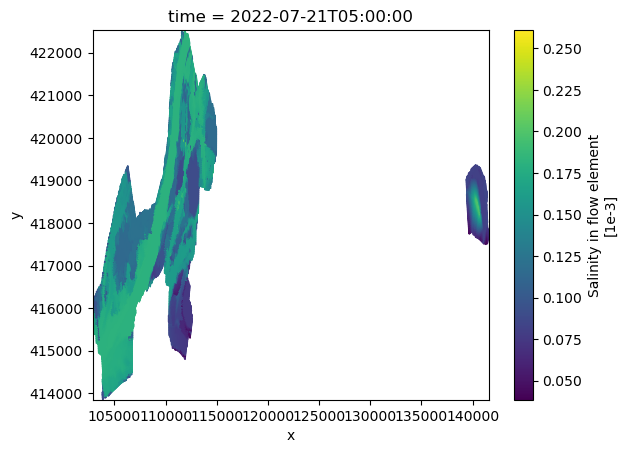

In [19]:
data_xr.isel(time=5, mesh2d_nLayers=45)['mesh2d_sa1'].ugrid.plot()

# Testing write total

In [20]:
out_file = r'testing_readwrite_map.nc'

In [41]:
# ds.ugrid.to_netcdf(out_file, compute=True)
with ProgressBar():
    ds.ugrid.to_netcdf(out_file, compute=True)

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/distributed/client.py:3163: UserWarning: Sending large graph of size 15.69 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


In [45]:
out_file = 'testing_readwrite2_map.nc'

In [46]:
xrds = ds.ugrid.to_dataset()
write_task = xrds.to_netcdf(out_file, compute=False)
with ProgressBar():
    write_task.compute()

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/distributed/client.py:3163: UserWarning: Sending large graph of size 14.87 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


In [53]:
testing_load = dfmt.open_partitioned_dataset('testing_readwrite_total_map.nc')

>> xu.open_dataset() with 1 partition(s): 1 [7 nan fillvalue attrs removed][nodomainvar] : 1.15 sec


# Testing write per variable

Determine the name of the output file.

In [73]:
out_file = r'variable_test.nc'

In [83]:
# Define counter for possible subdivision of times in writing
i = 0
tds = ds.isel(time=slice(0,100))

for v in keep_variables:

    # > Select the time
    print(f'Starting selection of variable {v}...')
    vds = tds[v].astype('float32', casting='same_kind') # first test with reducing the data

    print(f'Loaded the dataset at variable {v}.')

    if i == 0:
        # > For t = 0 in the range of timesteps, check if there's a file
        # > already present. If it is, remove it.
        if os.path.isfile(out_file):
            os.remove(out_file)

        # Use dask.delayed to write file to disk
        print('Writing file to disk...')
        print(f"Outputfile: {out_file}")
        vds.ugrid.to_netcdf(out_file, mode='w', compute=True)

    else:
        # Use dask.delayed to write file to disk
        print('Writing file to disk in append mode...')
        print(f"Outputfile: {out_file}")
        vds.ugrid.to_netcdf(out_file, mode='a', compute=True)

    # writing_task.compute()
    vds.close()

    # > Update counter
    i += 1

Starting selection of variable mesh2d_sa1...
Loaded the dataset at variable mesh2d_sa1.
Writing file to disk...
Outputfile: variable_test_sizedec.nc
Starting selection of variable mesh2d_node_z...
Loaded the dataset at variable mesh2d_node_z.
Writing file to disk in append mode...
Outputfile: variable_test_sizedec.nc
Starting selection of variable mesh2d_ucx...
Loaded the dataset at variable mesh2d_ucx.
Writing file to disk in append mode...
Outputfile: variable_test_sizedec.nc
Starting selection of variable mesh2d_ucy...
Loaded the dataset at variable mesh2d_ucy.
Writing file to disk in append mode...
Outputfile: variable_test_sizedec.nc


In [59]:
import xugrid as xu

Re-load the dataset to check written contents (first into xarray and then into an xugrid.UgridDataset).

In [76]:
testing_load2 = xr.open_dataset('variable_test_sizedec.nc')
testing_load2 = xu.UgridDataset(testing_load2)

Visualize the data.

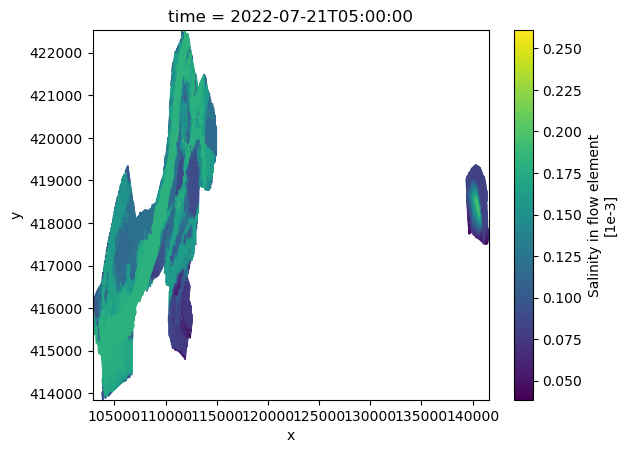

In [78]:
testing_load2.isel(time=5, mesh2d_nLayers=46)['mesh2d_sa1'].ugrid.plot()

In [79]:
testing_load2

<xarray.Dataset>
Dimensions:              (time: 100, mesh2d_nFaces: 20665, mesh2d_nLayers: 47,
                          mesh2d_nNodes: 21266, mesh2d_nEdges: 41929,
                          mesh2d_nInterfaces: 48)
Coordinates:
  * time                 (time) datetime64[ns] 2022-07-21 ... 2022-07-25T03:0...
    mesh2d_face_x        (mesh2d_nFaces) float64 ...
    mesh2d_face_y        (mesh2d_nFaces) float64 ...
    mesh2d_flowelem_zcc  (time, mesh2d_nFaces, mesh2d_nLayers) float64 ...
    mesh2d_node_x        (mesh2d_nNodes) float64 ...
    mesh2d_node_y        (mesh2d_nNodes) float64 ...
    mesh2d_edge_x        (mesh2d_nEdges) float64 ...
    mesh2d_edge_y        (mesh2d_nEdges) float64 ...
  * mesh2d_nEdges        (mesh2d_nEdges) int64 0 1 2 3 ... 41926 41927 41928
  * mesh2d_nFaces        (mesh2d_nFaces) int64 0 1 2 3 ... 20662 20663 20664
  * mesh2d_nNodes        (mesh2d_nNodes) int64 0 1 2 3 ... 21263 21264 21265
Dimensions without coordinates: mesh2d_nLayers, mesh2d_nInterfaces
Data variables:
    mesh2d_sa1           (time, mesh2d_nFaces, mesh2d_nLayers) float32 ...
    mesh2d_node_z        (mesh2d_nNodes) float32 ...
    mesh2d_ucx           (time, mesh2d_nFaces, mesh2d_nLayers) float32 ...
    mesh2d_ucy           (time, mesh2d_nFaces, mesh2d_nLayers) float32 ...
    mesh2d_ucz           (time, mesh2d_nFaces, mesh2d_nLayers) float32 ...
    mesh2d_vol1          (time, mesh2d_nFaces, mesh2d_nLayers) float32 ...
    mesh2d_vicwwu        (time, mesh2d_nEdges, mesh2d_nInterfaces) float32 ...
    mesh2d_tem1          (time, mesh2d_nFaces, mesh2d_nLayers) float32 ...
Attributes:
    Conventions:    CF-1.9 UGRID-1.0
    mesh:           mesh2d
    location:       face
    cell_methods:   mesh2d_nFaces: mean
    cell_measures:  volume: mesh2d_vol1
    grid_mapping:   projected_coordinate_system
    standard_name:  sea_water_temperature
    long_name:      Temperature in flow element
    units:          degC